In [1]:
using Printf
using BenchmarkTools
using Statistics
using CairoMakie
using LaTeXStrings
using Polynomials
using Random
using Distributions
using DelimitedFiles
using DataFrames
using JLD2
using Optim

In [2]:
CairoMakie.activate!(type = "svg")

In [3]:
A  = 2.75e8
EA = 74000
R  = 8.314
r(CA, CB, T) = A*exp(-EA/R/T)*CA*CB^2

r (generic function with 1 method)

In [4]:
Random.seed!(1234)
CA = 10 .^range(-3.1, 1.2, 5)
CB = 10 .^range(-3.1, 1.2, 5)
T  = collect(range(350, 550, 5))

d1 = r.(CA, CB[3], T[3])
d2 = r.(CA[3], CB, T[3])
d3 = r.(CA[3], CB[3], T)
d1 = d1.*rand(Normal(1.0, 0.3), length(d1))
d1 = round.(d1, sigdigits = 3)
d2 = d2.*rand(Normal(1.0, 0.3), length(d2))
d2 = round.(d2, sigdigits = 3)
d3 = d3.*rand(Normal(1.0, 0.3), length(d3))
d3 = round.(d3, sigdigits = 3)

CA_out = round.(vcat(CA, CA[3]*ones(length(CA)), CA[3]*ones(length(CA))), sigdigits = 3)
CB_out = round.(vcat(CB[3]*ones(length(CB)), CB, CB[3]*ones(length(CB))), sigdigits = 3)
T_out  = vcat(T[3]*ones(length(T)), T[3]*ones(length(T)), T)
d  = vcat(d1, d2, d3)

display(round.([CA d1], sigdigits = 3))
display(round.([CB d2], sigdigits = 3))
display(round.([T d3], sigdigits = 3))

5×2 Matrix{Float64}:
  0.000794  6.31e-6
  0.00944   0.000111
  0.112     0.000873
  1.33      0.0144
 15.8       0.159

5×2 Matrix{Float64}:
  0.000794   3.97e-8
  0.00944    1.14e-5
  0.112      0.0011
  1.33       0.128
 15.8       22.7

5×2 Matrix{Float64}:
 350.0  2.62e-6
 400.0  0.000107
 450.0  0.001
 500.0  0.00745
 550.0  0.0305

In [5]:
SSKINETICS_Flow = ["CA (mol/L)" "CB (moles)/L" "T (K)" "Rate (1/s)"]
SSKINETICS_Flow = vcat(SSKINETICS_Flow, [CA_out CB_out T_out d])
io = open("SSKINETICS_Flow.csv", "w")
writedlm(io, SSKINETICS_Flow, ',')
close(io)

In [6]:
SSKINETICS_Flow_df = DataFrame()
SSKINETICS_Flow_df."CA (mol/L)" = CA_out
SSKINETICS_Flow_df."CB (mol/L)" = CB_out
SSKINETICS_Flow_df."T (K)" = T_out
SSKINETICS_Flow_df."rate (1/s)" = d
save_object("SSKINETICS_Flow_df", SSKINETICS_Flow_df)

In [7]:
f1 = Polynomials.fit(log.(CA), log.(d1), 1)
f2 = Polynomials.fit(log.(CB), log.(d2), 1)
f3 = Polynomials.fit(1000 ./T, log.(d3), 1)
display(f1)
display(f2)
display(f3[1]*8.314)
# Plots.scatter(log.(CA), log.(d1))
# Plots.plot!(log.(CA), f1.(log.(CA))) 

# Plots.scatter(log.(CB), log.(d2))
# Plots.plot!(log.(CB), f2.(log.(CB))) 

# Plots.scatter(1000 ./(T), log.(d3))
# Plots.plot!(1000 ./T, f3.(1000 ./T))

Polynomial(-4.61927322681204 + 1.0154209342754632*x)

Polynomial(-2.4458308717341586 + 2.0060256575973403*x)

-74.53120517385426

In [8]:
[log.(CA) log.(d1)]

5×2 Matrix{Float64}:
 -7.13801   -11.9734
 -4.66273    -9.10598
 -2.18746    -7.04358
  0.287823   -4.24053
  2.7631     -1.83885

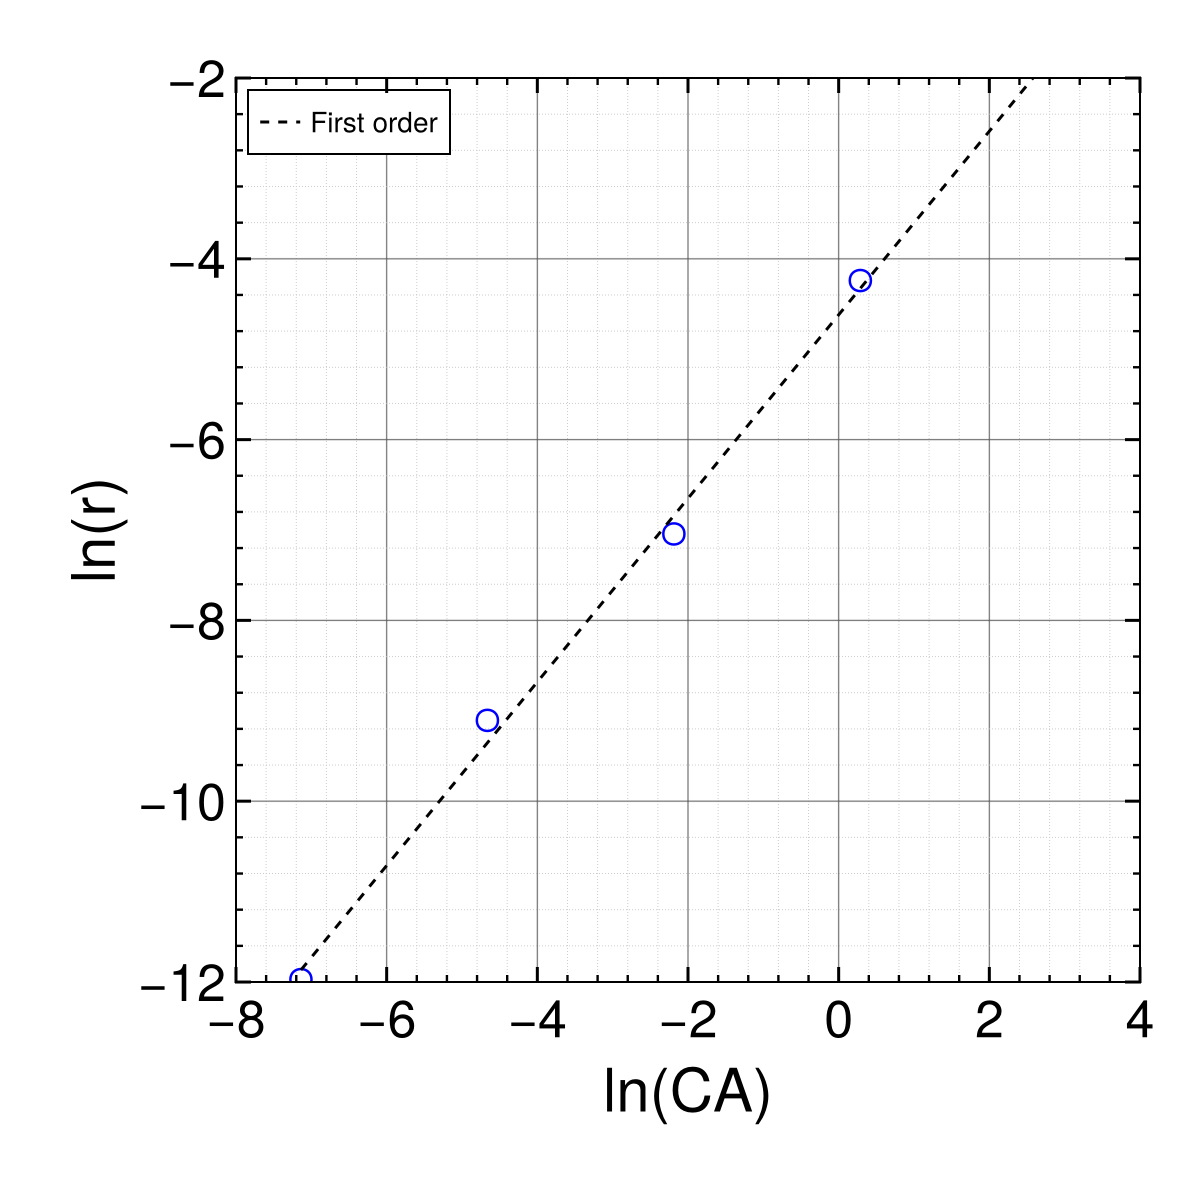

In [9]:
fig1 = Figure(size = (600, 600), backgroundcolor = "white", font = "Arial", figure_padding = 30)
ax1  = Axis(fig1[1,1])

CairoMakie.ylims!(ax1, -12, -2)
CairoMakie.xlims!(ax1, -8, 4)

ax1.xscale = identity
ax1.aspect = 1.0 
ax1.xticksvisible = true
ax1.xtickalign = 1
ax1.xminorticks = IntervalsBetween(5)
ax1.xminorticksvisible = true 
ax1.xminortickalign = 1
ax1.xminorgridvisible = true
ax1.xgridcolor = "gray50"
ax1.xgridstyle = :solid
ax1.xgridwidth = 0.5
ax1.xminorgridcolor = "gray80"
ax1.xminorgridstyle = :dot
ax1.xminorgridwidth = 0.5
ax1.xticks = -8:2:4
ax1.xlabel = "ln(CA)"
#ax1.xlabelfont = "Arial"
ax1.xlabelsize = 30
#ax1.xticklabelfont = "Arial"
ax1.xticklabelsize = 26
ax1.xticksize = 8.0
ax1.xtickwidth = 1.5
ax1.xminorticksize = 4.0
ax1.xminortickwidth = 1.2

ax1.yscale = identity
ax1.yticks     = -12:2:-2
ax1.ytickalign = 1
ax1.yticksvisible = true
ax1.yminorticksvisible = true
ax1.yminortickalign = 1
ax1.yminorticks = IntervalsBetween(5)
ax1.yminorgridvisible = true
ax1.yminorgridstyle = :dot
ax1.yminorgridwidth = 0.5
ax1.ygridcolor = "gray50"
ax1.ygridstyle = :solid
ax1.ygridwidth = 0.5
ax1.yminorgridcolor = "gray80"
ax1.ylabel = "ln(r)"
ax1.ylabelsize = 30
ax1.yticklabelsize = 26
ax1.yticksize = 8.0
ax1.ytickwidth = 1.5
ax1.yminorticksize = 4.0
ax1.yminortickwidth = 1.2

ax1.spinewidth = 1.00

ax2  = Axis(fig1[1,1], aspect = 1.0, yaxisposition = :right, xaxisposition = :top, xticksvisible = true, xtickalign = 1, xminorticks = IntervalsBetween(5), xminorticksvisible = true, xminortickalign = 1)
CairoMakie.ylims!(ax2, -12, -2)
CairoMakie.xlims!(ax2, -8, 4)
ax2.xscale = identity
ax2.yscale = identity
ax2.xticks = -8:2:4
ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false
ax2.xticksize = 8.0
ax2.xtickwidth = 1.5
ax2.xminorticksize = 4.0
ax2.xminortickwidth = 1.2

ax2.ytickalign = 1
ax2.yticksvisible = true
ax2.yminorticksvisible = true
ax2.yminortickalign = 1
ax2.yticks      = -12:2:-2
ax2.yminorticks = IntervalsBetween(5)
ax2.yticksize = 8.0
ax2.ytickwidth = 1.5
ax2.yminorticksize = 4.0
ax2.yminortickwidth = 1.2

pl1  = CairoMakie.scatter!(log.(CA), log.(d1), marker = :circle, markersize = 15, strokewidth = 1.25, strokecolor = :blue, color = (:white, 0.0))
pl1  = CairoMakie.lines!(log.(CA), f1.(log.(CA)), label = "First order", color = :black, linestyle = :dash, linewidth = 1.5)
axislegend(position = :lt, framevisible = true)
fig1
#save("Steady1.svg", fig1)

In [10]:
[log.(CB) log.(d2)]

5×2 Matrix{Float64}:
 -7.13801   -17.0419
 -4.66273   -11.3819
 -2.18746    -6.81245
  0.287823   -2.05573
  2.7631      3.12236

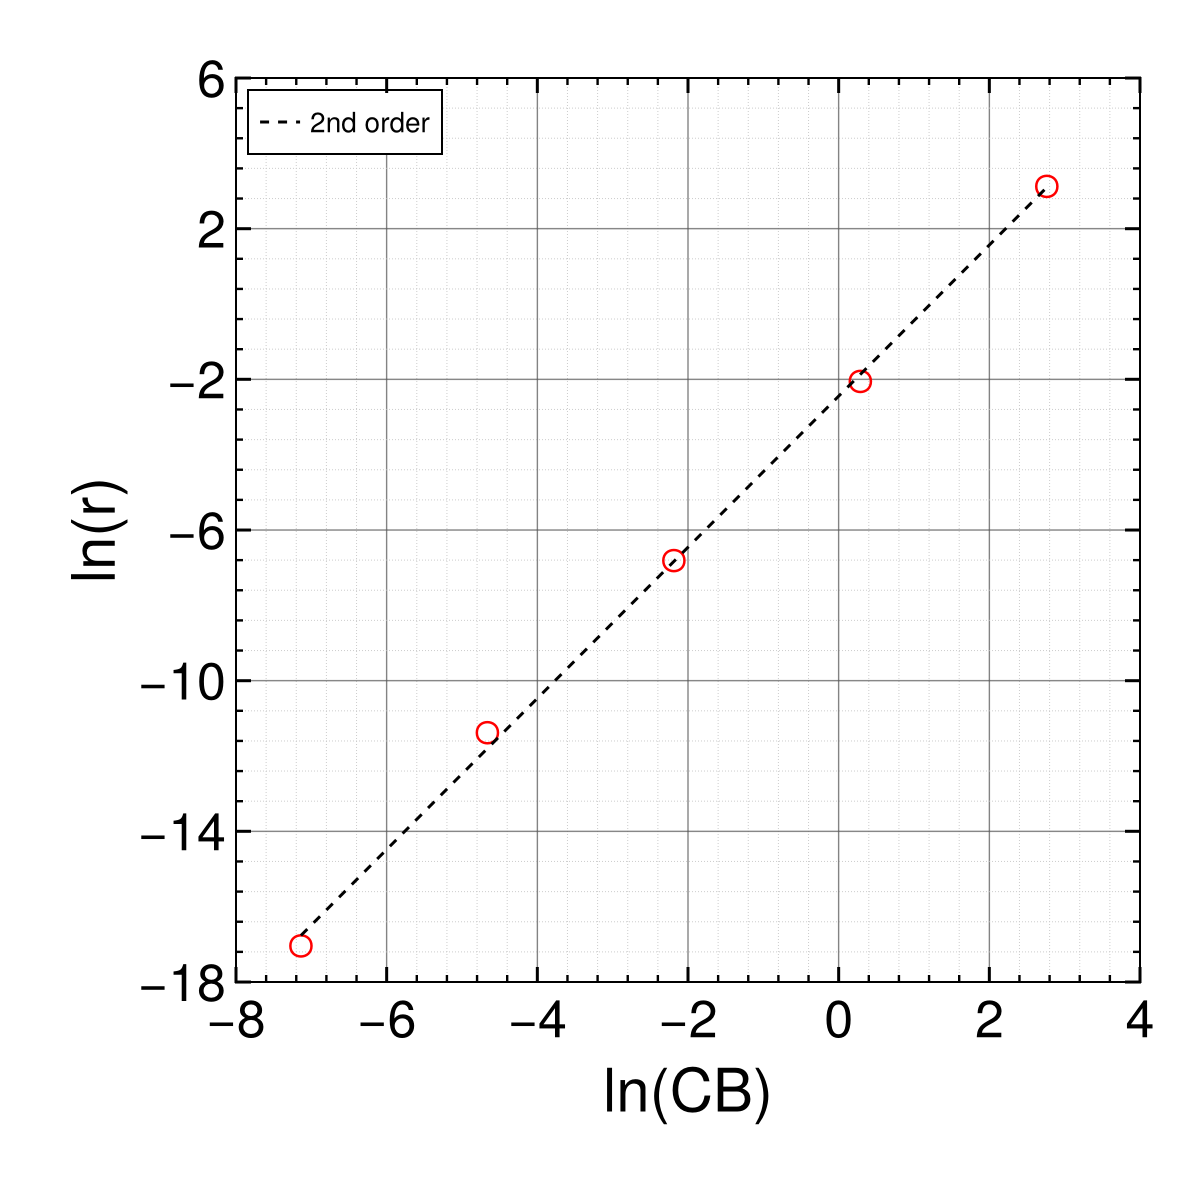

In [11]:
fig1 = Figure(size = (600, 600), backgroundcolor = "white", font = "Arial", figure_padding = 30)
ax1  = Axis(fig1[1,1])

CairoMakie.ylims!(ax1, -18, 6)
CairoMakie.xlims!(ax1, -8, 4)

ax1.xscale = identity
ax1.aspect = 1.0 
ax1.xticksvisible = true
ax1.xtickalign = 1
ax1.xminorticks = IntervalsBetween(5)
ax1.xminorticksvisible = true 
ax1.xminortickalign = 1
ax1.xminorgridvisible = true
ax1.xgridcolor = "gray50"
ax1.xgridstyle = :solid
ax1.xgridwidth = 0.5
ax1.xminorgridcolor = "gray80"
ax1.xminorgridstyle = :dot
ax1.xminorgridwidth = 0.5
ax1.xticks = -8:2:4
ax1.xlabel = "ln(CB)"
#ax1.xlabelfont = "Arial"
ax1.xlabelsize = 30
#ax1.xticklabelfont = "Arial"
ax1.xticklabelsize = 26
ax1.xticksize = 8.0
ax1.xtickwidth = 1.5
ax1.xminorticksize = 4.0
ax1.xminortickwidth = 1.2

ax1.yscale = identity
ax1.yticks     = -18:4:6
ax1.ytickalign = 1
ax1.yticksvisible = true
ax1.yminorticksvisible = true
ax1.yminortickalign = 1
ax1.yminorticks = IntervalsBetween(5)
ax1.yminorgridvisible = true
ax1.yminorgridstyle = :dot
ax1.yminorgridwidth = 0.5
ax1.ygridcolor = "gray50"
ax1.ygridstyle = :solid
ax1.ygridwidth = 0.5
ax1.yminorgridcolor = "gray80"
ax1.ylabel = "ln(r)"
ax1.ylabelsize = 30
ax1.yticklabelsize = 26
ax1.yticksize = 8.0
ax1.ytickwidth = 1.5
ax1.yminorticksize = 4.0
ax1.yminortickwidth = 1.2

ax1.spinewidth = 1.00

ax2  = Axis(fig1[1,1], aspect = 1.0, yaxisposition = :right, xaxisposition = :top, xticksvisible = true, xtickalign = 1, xminorticks = IntervalsBetween(5), xminorticksvisible = true, xminortickalign = 1)
CairoMakie.ylims!(ax2, -18, 6)
CairoMakie.xlims!(ax2, -8, 4)
ax2.xscale = identity
ax2.yscale = identity
ax2.xticks = -8:2:4
ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false
ax2.xticksize = 8.0
ax2.xtickwidth = 1.5
ax2.xminorticksize = 4.0
ax2.xminortickwidth = 1.2

ax2.ytickalign = 1
ax2.yticksvisible = true
ax2.yminorticksvisible = true
ax2.yminortickalign = 1
ax2.yticks      = -18:4:6
ax2.yminorticks = IntervalsBetween(5)
ax2.yticksize = 8.0
ax2.ytickwidth = 1.5
ax2.yminorticksize = 4.0
ax2.yminortickwidth = 1.2

pl1  = CairoMakie.scatter!(log.(CB), log.(d2), marker = :circle, markersize = 15, strokewidth = 1.25, strokecolor = :red, color = (:white, 0.0))
pl1  = CairoMakie.lines!(log.(CB), f2.(log.(CB)), label = "2nd order", color = :black, linestyle = :dash, linewidth = 1.5)
axislegend(position = :lt, framevisible = true)
fig1
#save("Steady2.svg", fig1)

In [12]:
[1000 ./T log.(d3)]

5×2 Matrix{Float64}:
 2.85714  -12.8523
 2.5       -9.14268
 2.22222   -6.90776
 2.0       -4.89954
 1.81818   -3.49003

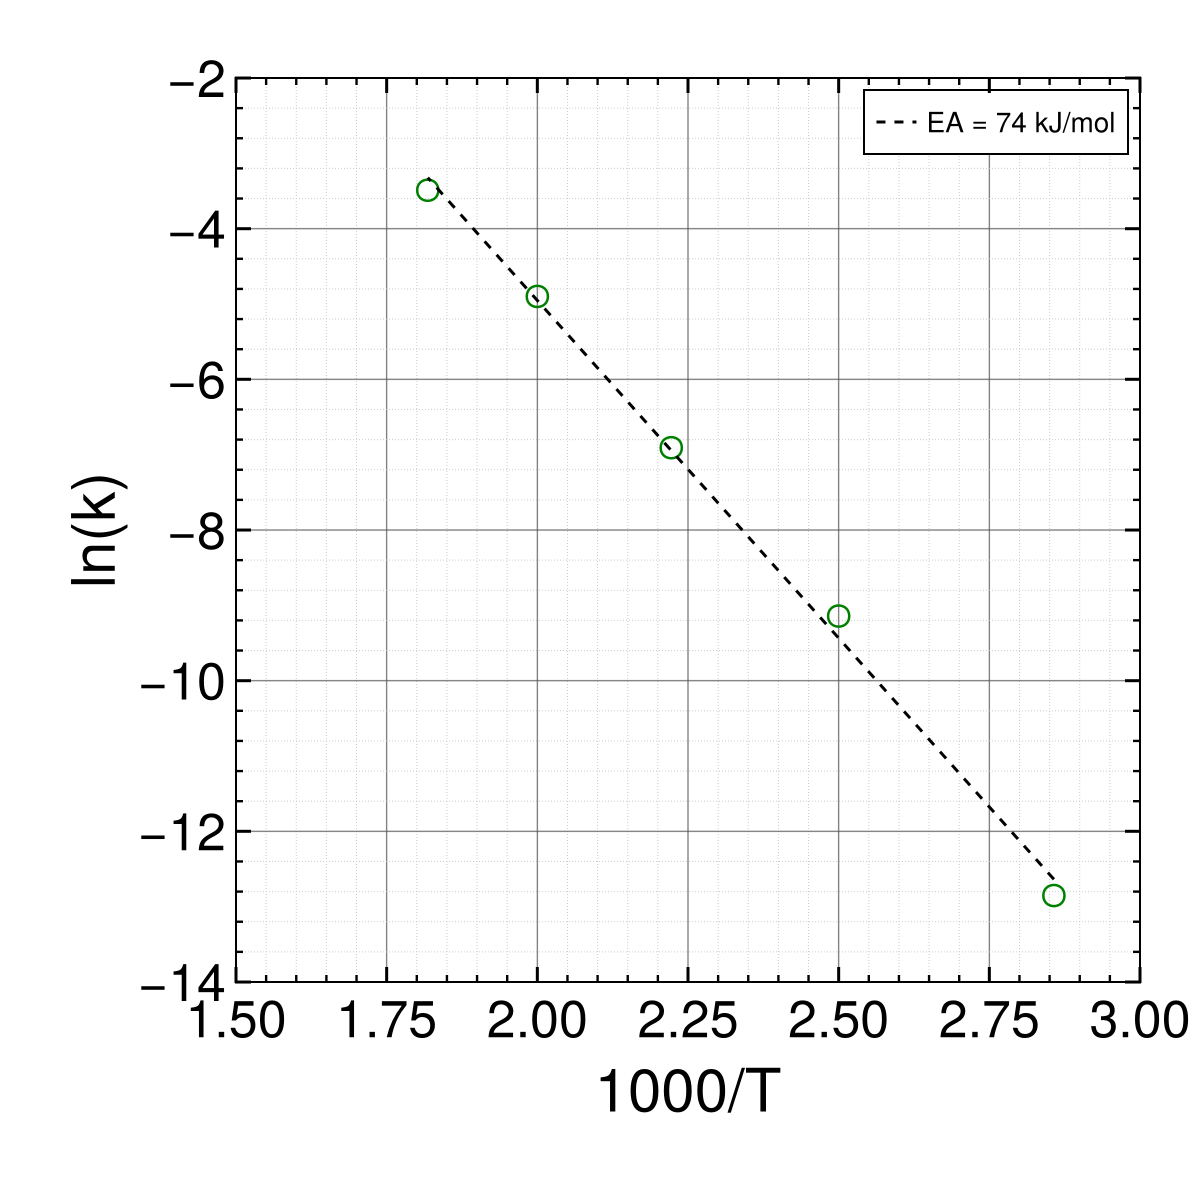

In [13]:
fig1 = Figure(size = (600, 600), backgroundcolor = "white", font = "Arial", figure_padding = 30)
ax1  = Axis(fig1[1,1])

CairoMakie.ylims!(ax1, -14, -2)
CairoMakie.xlims!(ax1, 1.5, 3)

ax1.xscale = identity
ax1.aspect = 1.0 
ax1.xticksvisible = true
ax1.xtickalign = 1
ax1.xminorticks = IntervalsBetween(5)
ax1.xminorticksvisible = true 
ax1.xminortickalign = 1
ax1.xminorgridvisible = true
ax1.xgridcolor = "gray50"
ax1.xgridstyle = :solid
ax1.xgridwidth = 0.5
ax1.xminorgridcolor = "gray80"
ax1.xminorgridstyle = :dot
ax1.xminorgridwidth = 0.5
ax1.xticks = 1.5:0.25:3
ax1.xlabel = "1000/T"
#ax1.xlabelfont = "Arial"
ax1.xlabelsize = 30
#ax1.xticklabelfont = "Arial"
ax1.xticklabelsize = 26
ax1.xticksize = 8.0
ax1.xtickwidth = 1.5
ax1.xminorticksize = 4.0
ax1.xminortickwidth = 1.2

ax1.yscale = identity
ax1.yticks     = -14:2:2
ax1.ytickalign = 1
ax1.yticksvisible = true
ax1.yminorticksvisible = true
ax1.yminortickalign = 1
ax1.yminorticks = IntervalsBetween(5)
ax1.yminorgridvisible = true
ax1.yminorgridstyle = :dot
ax1.yminorgridwidth = 0.5
ax1.ygridcolor = "gray50"
ax1.ygridstyle = :solid
ax1.ygridwidth = 0.5
ax1.yminorgridcolor = "gray80"
ax1.ylabel = "ln(k)"
ax1.ylabelsize = 30
ax1.yticklabelsize = 26
ax1.yticksize = 8.0
ax1.ytickwidth = 1.5
ax1.yminorticksize = 4.0
ax1.yminortickwidth = 1.2

ax1.spinewidth = 1.00

ax2  = Axis(fig1[1,1], aspect = 1.0, yaxisposition = :right, xaxisposition = :top, xticksvisible = true, xtickalign = 1, xminorticks = IntervalsBetween(5), xminorticksvisible = true, xminortickalign = 1)
CairoMakie.ylims!(ax2, -14, -2)
CairoMakie.xlims!(ax2, 1.5, 3)
ax2.xscale = identity
ax2.yscale = identity
ax2.xticks = 1.5:0.25:3
ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false
ax2.xticksize = 8.0
ax2.xtickwidth = 1.5
ax2.xminorticksize = 4.0
ax2.xminortickwidth = 1.2

ax2.ytickalign = 1
ax2.yticksvisible = true
ax2.yminorticksvisible = true
ax2.yminortickalign = 1
ax2.yticks      = -14:2:2
ax2.yminorticks = IntervalsBetween(5)
ax2.yticksize = 8.0
ax2.ytickwidth = 1.5
ax2.yminorticksize = 4.0
ax2.yminortickwidth = 1.2

pl1  = CairoMakie.scatter!(1000 ./(T), log.(d3), marker = :circle, markersize = 15, strokewidth = 1.25, strokecolor = :green, color = (:white, 0.0))
pl1  = CairoMakie.lines!(1000 ./(T), f3.(1000 ./T), label = "EA = 74 kJ/mol", color = :black, linestyle = :dash, linewidth = 1.5)
axislegend(position = :rt, framevisible = true)
fig1
#save("Steady3.svg", fig1)

In [14]:
function temp(par)
    A = 2.75e8
    EA = par[1]
    a  = par[2]
    b  = par[3]
    rm(CA, CB, T) = A*exp(-EA/R/T)*CA^a*CB^b
    m1 = rm.(CA, CB[3], T[3])
    m2 = rm.(CA[3], CB, T[3])
    m3 = rm.(CA[3], CB[3], T)
    m  = vcat(m1, m2, m3)
    e1 = (d1 - m1)./d1
    e2 = (d2 - m2)./d2
    e3 = (d3 - m3)./d3
    e  = vcat(e1, e2, e3)
    SSE = sum(e.^2)
    return SSE, e, m
end

obj(par) = temp(par)[1]

obj (generic function with 1 method)

In [15]:
sol = Optim.optimize(obj, [74000., 1.5, 2.3])
display(sol.minimizer)
SSE, e, m = temp(sol.minimizer)
#Plots.scatter(e)
#Plots.scatter(log10.(d), log10.(m))
#Plots.plot!([-7, 2], [-7, 2], legend = nothing)

3-element Vector{Float64}:
 73835.61586498845
     1.0162213414537682
     2.0162042127569983

(0.5390266438544914, [-0.006232835557806683, 0.2923104092488642, -0.11324174873072168, 0.1650140294357368, 0.0644166413160049, -0.13233300017254268, 0.42019848140270327, 0.1164908666891637, -0.11638318787500035, 0.07441367659289508, -0.3196744603448831, 0.22935500042879398, 0.02813995335808003, 0.06127167000415276, -0.15253422980801387], [6.34932919236976e-6, 7.855354457337608e-5, 0.00097186004664192, 0.01202379797612539, 0.14875775403075522, 4.495362010684994e-8, 6.609737312009182e-6, 0.00097186004664192, 0.14289704804800005, 21.01080954134128, 3.4575470861035937e-6, 8.245901495411904e-5, 0.00097186004664192, 0.006993526058469062, 0.03515229400914442])

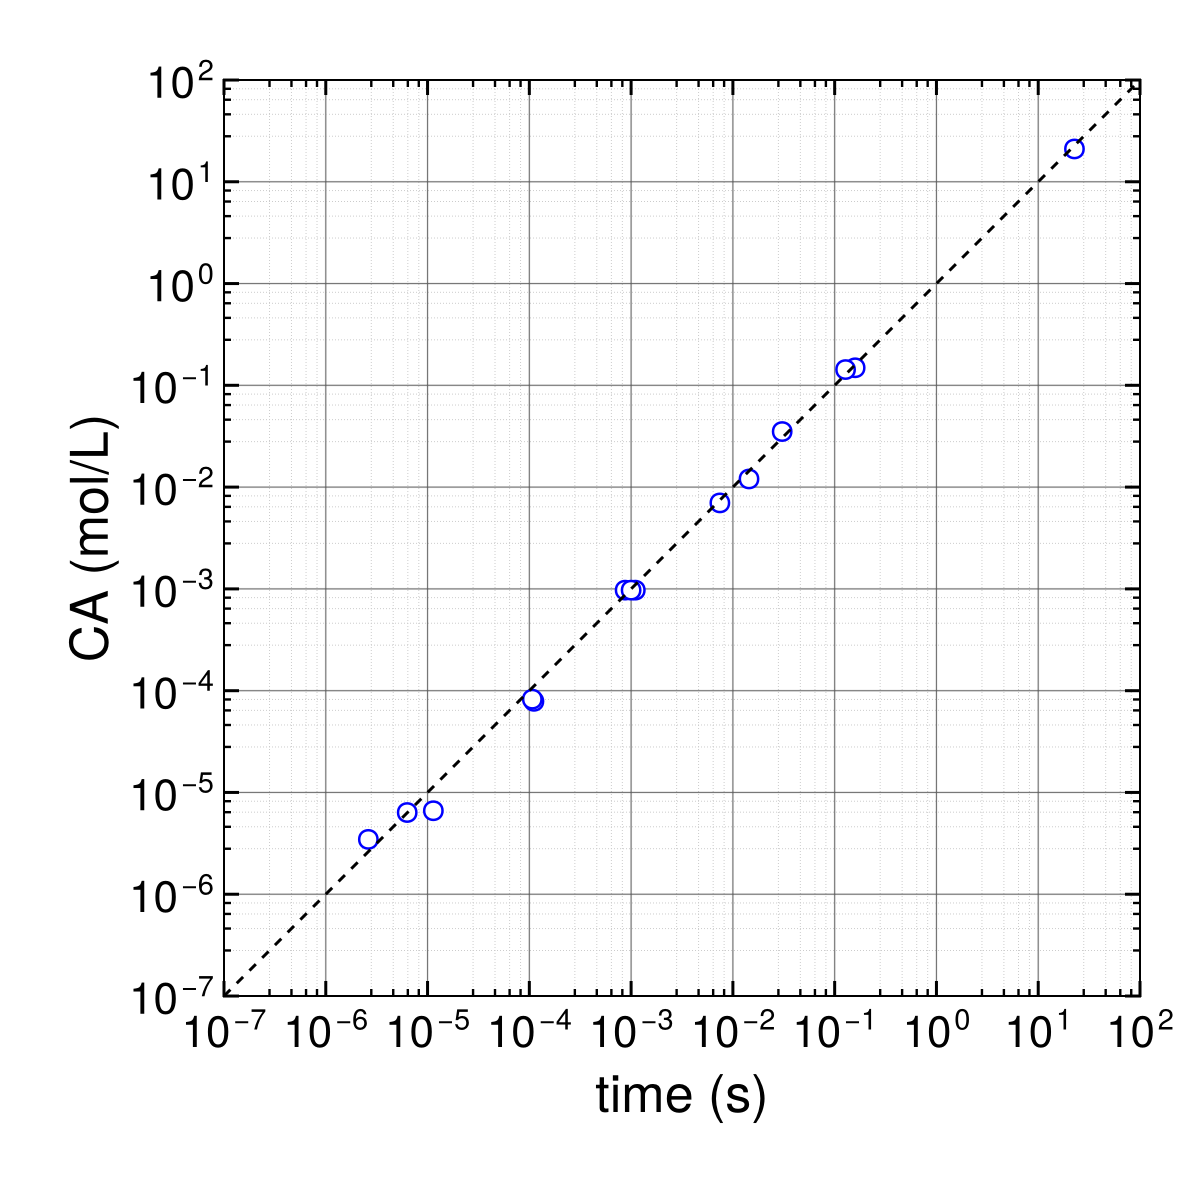

In [16]:
fig1 = Figure(size = (600, 600), backgroundcolor = "white", font = "Arial", figure_padding = 30)
ax1  = Axis(fig1[1,1])

CairoMakie.ylims!(ax1, 1e-7, 100)
CairoMakie.xlims!(ax1, 1e-7, 100)

ax1.xscale = log10
ax1.aspect = 1.0 
ax1.xticksvisible = true
ax1.xtickalign = 1
ax1.xminorticks = IntervalsBetween(5)
ax1.xminorticksvisible = true 
ax1.xminortickalign = 1
ax1.xminorgridvisible = true
ax1.xgridcolor = "gray50"
ax1.xgridstyle = :solid
ax1.xgridwidth = 0.5
ax1.xminorgridcolor = "gray80"
ax1.xminorgridstyle = :dot
ax1.xminorgridwidth = 0.5
#ax1.xticks = 0:20:100
ax1.xlabel = "time (s)"
#ax1.xlabelfont = "Arial"
ax1.xlabelsize = 26
#ax1.xticklabelfont = "Arial"
ax1.xticklabelsize = 22
ax1.xticksize = 8.0
ax1.xtickwidth = 1.5
ax1.xminorticksize = 4.0
ax1.xminortickwidth = 1.2

ax1.yscale = log10
#ax1.yticks     = 0:2:10
ax1.ytickalign = 1
ax1.yticksvisible = true
ax1.yminorticksvisible = true
ax1.yminortickalign = 1
ax1.yminorticks = IntervalsBetween(5)
ax1.yminorgridvisible = true
ax1.yminorgridstyle = :dot
ax1.yminorgridwidth = 0.5
ax1.ygridcolor = "gray50"
ax1.ygridstyle = :solid
ax1.ygridwidth = 0.5
ax1.yminorgridcolor = "gray80"
ax1.ylabel = "CA (mol/L)"
ax1.ylabelsize = 26
ax1.yticklabelsize = 22
ax1.yticksize = 8.0
ax1.ytickwidth = 1.5
ax1.yminorticksize = 4.0
ax1.yminortickwidth = 1.2

ax1.spinewidth = 1.00

ax2  = Axis(fig1[1,1], aspect = 1.0, yaxisposition = :right, xaxisposition = :top, xticksvisible = true, xtickalign = 1, xminorticks = IntervalsBetween(5), xminorticksvisible = true, xminortickalign = 1)
CairoMakie.ylims!(ax2, 1e-7, 100)
CairoMakie.xlims!(ax2, 1e-7, 100)
ax2.xscale = log10
ax2.yscale = log10
#ax2.xticks = 0:20:100
ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false
ax2.xticksize = 8.0
ax2.xtickwidth = 1.5
ax2.xminorticksize = 4.0
ax2.xminortickwidth = 1.2

ax2.ytickalign = 1
ax2.yticksvisible = true
ax2.yminorticksvisible = true
ax2.yminortickalign = 1
#ax2.yticks      = 0:2:10
ax2.yminorticks = IntervalsBetween(5)
ax2.yticksize = 8.0
ax2.ytickwidth = 1.5
ax2.yminorticksize = 4.0
ax2.yminortickwidth = 1.2

pl1  = CairoMakie.scatter!(d, m, marker = :circle, markersize = 13, strokewidth = 1.25, strokecolor = :blue, color = :white)
pl1  = CairoMakie.lines!([1e-7, 100], [1e-7, 100], color = :black, linestyle = :dash, linewidth = 1.5)
fig1